Find elevation data and average temperature data for US counties.
Compare elevation to annual temps and rainfall.
Import google maps and create topographical/weather/rainfall maps based on the county data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from API_data import gmap_key
import requests
import gmaps

pop_data_csvreader = pd.read_csv("./co-est2019-alldata.csv")
elevation_data = pd.read_csv("./POP_PLACES_20200501.txt",delimiter="|")
temp_csvreader = pd.read_csv("./Temperature_Data.csv")
precip_csvreader = pd.read_csv("./Precipitation_Data.csv")

In [4]:
# Format population data
pop_df = pd.DataFrame(pop_data_csvreader)
new_pop_df = pop_df[["CTYNAME","STABBREV","POPESTIMATE2010","POPESTIMATE2019"]]
new_pop_df = new_pop_df[new_pop_df["CTYNAME"].str.contains("County")]
new_pop_df = new_pop_df.reset_index(drop=True)
new_pop_df["County"] = new_pop_df["CTYNAME"] + ", " + new_pop_df["STABBREV"]
new_pop_df = new_pop_df.rename(columns={"POPESTIMATE2010":"2010 Pop","POPESTIMATE2019":"2019 Pop"})
new_pop_df["Pop Change"] = new_pop_df["2019 Pop"] - new_pop_df["2010 Pop"]
new_pop_df = new_pop_df[["County","2010 Pop","2019 Pop","Pop Change"]]
new_pop_df["Pop Growth Percent"] = round(100 * new_pop_df["Pop Change"]/new_pop_df["2010 Pop"],2)
new_pop_df.head()

County  2010 Pop  2019 Pop  Pop Change  Pop Growth Percent
0  Autauga County, AL     54773     55869        1096                2.00
1  Baldwin County, AL    183112    223234       40122               21.91
2  Barbour County, AL     27327     24686       -2641               -9.66
3     Bibb County, AL     22870     22394        -476               -2.08
4   Blount County, AL     57376     57826         450                0.78

In [5]:
# Format elevation data
elevation_data = pd.read_csv("./POP_PLACES_20200501.txt",delimiter="|")
elevation_data = elevation_data[["COUNTY_NAME","STATE_ALPHA","ELEV_IN_FT"]]
elevation_data = elevation_data.dropna(how='any')
elevation_data["COUNTY_NAME"] = elevation_data["COUNTY_NAME"].astype(str)+" County"
elevation_data["County"] = elevation_data["COUNTY_NAME"] + ", " + elevation_data["STATE_ALPHA"]
elevation_data = elevation_data[["County","ELEV_IN_FT"]]
new_elevation_data = elevation_data.rename(columns={"ELEV_IN_FT":"Elevation (feet)"})
county_elevations = new_elevation_data.groupby(["County"], as_index=False)
mean_county_elev = county_elevations.mean()
mean_county_elev.head()

County  Elevation (feet)
0  Abbeville County, SC        616.844828
1     Acadia County, LA         31.040816
2   Accomack County, VA         20.609756
3        Ada County, ID       2842.896552
4      Adair County, IA       1287.222222

In [6]:
# Format temperature data
temp_csvreader["2010-2019 Avg Temp (F)"] = (temp_csvreader["2010-2014 Avg Temp"] + temp_csvreader["2015-2019 Avg Temp"])/2
temp_df = temp_csvreader[["COUNTY","2010-2019 Avg Temp (F)"]]
temp_df = temp_df.rename(columns={"COUNTY":"County"})
temp_df.head()

County  2010-2019 Avg Temp (F)
0  Autauga County, AL                   65.00
1  Baldwin County, AL                   67.85
2  Barbour County, AL                   65.65
3     Bibb County, AL                   63.60
4   Blount County, AL                   62.20

In [7]:
# Format precipitation data
precip_csvreader["2010-2019 Total (in)"] = precip_csvreader["2010-2014 Total (in)"]+precip_csvreader["2015-2019 Total (in)"]
precip_csvreader["2010-2019 Avg Annual Rainfall (in)"] = round(precip_csvreader["2010-2019 Total (in)"]/10,2)
precip_df = precip_csvreader[["Location","2010-2019 Avg Annual Rainfall (in)"]]
precip_df = precip_df.rename(columns={"Location":"County"})
precip_df.head()

County  2010-2019 Avg Annual Rainfall (in)
0  Autauga County, AL                               54.36
1  Baldwin County, AL                               63.76
2  Barbour County, AL                               52.10
3     Bibb County, AL                               54.78
4   Blount County, AL                               57.20

In [8]:
# Merge temperature and precipitation dataframes together
weather_df = temp_df.merge(precip_df)
# weather_df

In [9]:
# Merge weather and elevation dataframes
geo_df = weather_df.merge(mean_county_elev)
# geo_df

In [11]:
# Merge geographic and population dataframes
complete_df = geo_df.merge(new_pop_df)
complete_df.head()

County  2010-2019 Avg Temp (F)  \
0  Autauga County, AL                   65.00   
1  Baldwin County, AL                   67.85   
2  Barbour County, AL                   65.65   
3     Bibb County, AL                   63.60   
4   Blount County, AL                   62.20   

   2010-2019 Avg Annual Rainfall (in)  Elevation (feet)  2010 Pop  2019 Pop  \
0                               54.36        346.469697     54773     55869   
1                               63.76        103.361842    183112    223234   
2                               52.10        410.263158     27327     24686   
3                               54.78        424.610000     22870     22394   
4                               57.20        726.052632     57376     57826   

   Pop Change  Pop Growth Percent  
0        1096                2.00  
1       40122               21.91  
2       -2641               -9.66  
3        -476               -2.08  
4         450                0.78

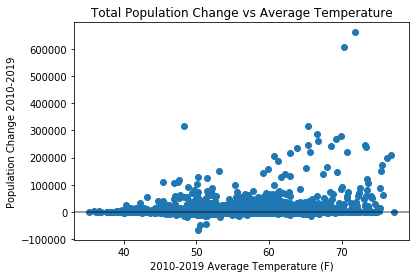

In [12]:
# Find correlation between weather and pop change
# Scatter plot of average temperature and total pop change
plt.scatter(complete_df["2010-2019 Avg Temp (F)"],complete_df["Pop Change"])
plt.xlabel("2010-2019 Average Temperature (F)")
plt.ylabel("Population Change 2010-2019")
plt.title("Total Population Change vs Average Temperature")
plt.axhline(y=0,color="black",alpha=0.5)
plt.show()

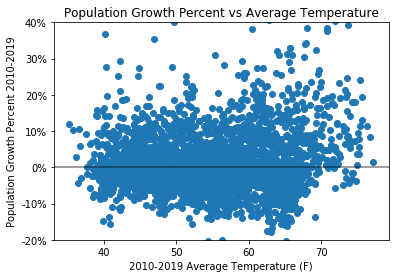

In [13]:
# Scatter plot of average temperature and pop growth percent
labels=["-20%","-10%","0%","10%","20%","30%","40%"]
plt.scatter(complete_df["2010-2019 Avg Temp (F)"],complete_df["Pop Growth Percent"])
plt.xlabel("2010-2019 Average Temperature (F)")
plt.ylabel("Population Growth Percent 2010-2019")
plt.title("Population Growth Percent vs Average Temperature")
plt.ylim(-20,40)
plt.yticks(np.arange(-20,50,step=10),labels)
plt.axhline(y=0,color="black",alpha=0.5)
plt.show()

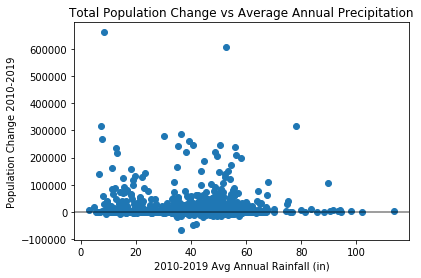

In [14]:
# Find correlation between precipitation and pop change
# Scatter plot of average annual precipitation and total pop change
plt.scatter(complete_df["2010-2019 Avg Annual Rainfall (in)"],complete_df["Pop Change"])
plt.xlabel("2010-2019 Avg Annual Rainfall (in)")
plt.ylabel("Population Change 2010-2019")
plt.title("Total Population Change vs Average Annual Precipitation")
plt.axhline(y=0,color="black",alpha=0.5)
plt.show()

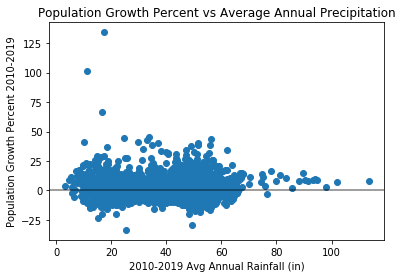

In [15]:
# Scatter plot of average annual precipitation and pop growth percent
plt.scatter(complete_df["2010-2019 Avg Annual Rainfall (in)"],complete_df["Pop Growth Percent"])
plt.xlabel("2010-2019 Avg Annual Rainfall (in)")
plt.ylabel("Population Growth Percent 2010-2019")
plt.title("Population Growth Percent vs Average Annual Precipitation")
plt.axhline(y=0,color="black",alpha=0.5)
plt.show()

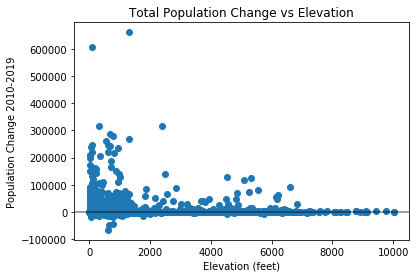

In [16]:
# Scatter plot of elevation and pop change
plt.scatter(complete_df["Elevation (feet)"],complete_df["Pop Change"])
plt.xlabel("Elevation (feet)")
plt.ylabel("Population Change 2010-2019")
plt.title("Total Population Change vs Elevation")
plt.axhline(y=0,color="black",alpha=0.5)
plt.show()

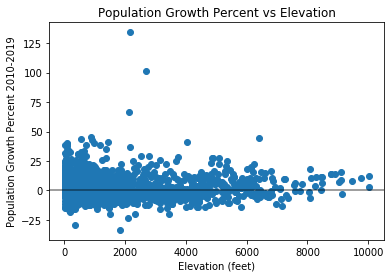

In [17]:
# Scatter plot of elevation and pop growth percent
plt.scatter(complete_df["Elevation (feet)"],complete_df["Pop Growth Percent"])
plt.xlabel("Elevation (feet)")
plt.ylabel("Population Growth Percent 2010-2019")
plt.title("Population Growth Percent vs Elevation")
plt.axhline(y=0,color="black",alpha=0.5)
plt.show()

In [18]:
# group data to allow us to do API calls
grouped_df = complete_df
grouped_df["Group"] = ""
grouped_df["Index"] = grouped_df.index
group_list =[]    

for index, row in grouped_df.iterrows():
    if row["Index"] >= 0 and row["Index"] < 300:
        group_list.append("1")    
    if row["Index"] >= 300 and row["Index"] < 600:
        group_list.append("2")
    if row["Index"] >= 600 and row["Index"] < 900:
        group_list.append("3")
    if row["Index"] >= 900 and row["Index"] < 1200:
        group_list.append("4")
    if row["Index"] >= 1200 and row["Index"] < 1500:
        group_list.append("5")
    if row["Index"] >= 1500 and row["Index"] < 1800:
        group_list.append("6")
    if row["Index"] >= 1800 and row["Index"] < 2100:
        group_list.append("7")
    if row["Index"] >= 2100 and row["Index"] < 2400:
        group_list.append("8")
    if row["Index"] >= 2400 and row["Index"] < 2700:
        group_list.append("9")
    if row["Index"] >= 2700 and row["Index"] < 3002:
        group_list.append("10")
    
grouped_df["Group"] = group_list
grouped_df = grouped_df.drop(columns=["Index"])
grouped_df["Lat"] = ""
grouped_df["Lon"] = ""
grouped_df

County  2010-2019 Avg Temp (F)  \
0        Autauga County, AL                   65.00   
1        Baldwin County, AL                   67.85   
2        Barbour County, AL                   65.65   
3           Bibb County, AL                   63.60   
4         Blount County, AL                   62.20   
...                     ...                     ...   
2996  Sweetwater County, WY                   42.75   
2997       Teton County, WY                   35.85   
2998       Uinta County, WY                   40.85   
2999    Washakie County, WY                   44.90   
3000      Weston County, WY                   45.10   

      2010-2019 Avg Annual Rainfall (in)  Elevation (feet)  2010 Pop  \
0                                  54.36        346.469697     54773   
1                                  63.76        103.361842    183112   
2                                  52.10        410.263158     27327   
3                                  54.78        424.610000     22870   
4                                  57.20        726.052632     57376   
...                                  ...               ...       ...   
2996                               10.11       6681.562500     43574   
2997                               37.58       6585.350000     21296   
2998                               13.10       6817.791667     21089   
2999                               13.36       4254.454545      8530   
3000                               16.49       4534.578947      7198   

      2019 Pop  Pop Change  Pop Growth Percent Group Lat Lon  
0        55869        1096                2.00     1          
1       223234       40122               21.91     1          
2        24686       -2641               -9.66     1          
3        22394        -476               -2.08     1          
4        57826         450                0.78     1          
...        ...         ...                 ...   ...  ..  ..  
2996     42343       -1231               -2.83    10          
2997     23464        2168               10.18    10          
2998     20226        -863               -4.09    10          
2999      7805        -725               -8.50    10          
3000      6927        -271               -3.76    10          

[3001 rows x 11 columns]

In [19]:
# API call in sets of groups to get latitude/longitude coordinates for each county
base_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input="
lat_list = []
lon_list = []
for index, rows in grouped_df.iterrows():
    if rows["Group"] == "1":
        try:
            response = requests.get(f"{base_url}{rows['County']}&inputtype=textquery&fields=name,geometry&key={gmap_key}").json()
            try:
                lat = response["candidates"][0]["geometry"]["location"]["lat"]
                lon = response["candidates"][0]["geometry"]["location"]["lng"]
                lat_list.append(lat)
                lon_list.append(lon)
            except:
                try:
                    lat = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lat"]
                    lon = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lng"]
                    lat_list.append(lat)
                    lon_list.append(lon)             
                except:
                    try:
                        lat = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lat"]
                        lon = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lng"]
                        lat_list.append(lat)
                        lon_list.append(lon)                        
                    except:    
                        lat_list.append("NOT FOUND")
                        lon_list.append("NOT FOUND")
        except:
            pass
    else:
        pass

In [22]:
for index, rows in grouped_df.iterrows():
    if rows["Group"] == "2":
        try:
            response = requests.get(f"{base_url}{rows['County']}&inputtype=textquery&fields=name,geometry&key={gmap_key}").json()
            try:
                lat = response["candidates"][0]["geometry"]["location"]["lat"]
                lon = response["candidates"][0]["geometry"]["location"]["lng"]
                lat_list.append(lat)
                lon_list.append(lon)
            except:
                try:
                    lat = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lat"]
                    lon = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lng"]
                    lat_list.append(lat)
                    lon_list.append(lon)             
                except:
                    try:
                        lat = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lat"]
                        lon = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lng"]
                        lat_list.append(lat)
                        lon_list.append(lon)                        
                    except:    
                        lat_list.append("NOT FOUND")
                        lon_list.append("NOT FOUND")
        except:
            pass
    else:
        pass

In [24]:
for index, rows in grouped_df.iterrows():
    if rows["Group"] == "3":
        try:
            response = requests.get(f"{base_url}{rows['County']}&inputtype=textquery&fields=name,geometry&key={gmap_key}").json()
            try:
                lat = response["candidates"][0]["geometry"]["location"]["lat"]
                lon = response["candidates"][0]["geometry"]["location"]["lng"]
                lat_list.append(lat)
                lon_list.append(lon)
            except:
                try:
                    lat = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lat"]
                    lon = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lng"]
                    lat_list.append(lat)
                    lon_list.append(lon)             
                except:
                    try:
                        lat = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lat"]
                        lon = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lng"]
                        lat_list.append(lat)
                        lon_list.append(lon)                        
                    except:    
                        lat_list.append("NOT FOUND")
                        lon_list.append("NOT FOUND")
        except:
            pass
    else:
        pass

In [26]:
for index, rows in grouped_df.iterrows():
    if rows["Group"] == "4":
        try:
            response = requests.get(f"{base_url}{rows['County']}&inputtype=textquery&fields=name,geometry&key={gmap_key}").json()
            try:
                lat = response["candidates"][0]["geometry"]["location"]["lat"]
                lon = response["candidates"][0]["geometry"]["location"]["lng"]
                lat_list.append(lat)
                lon_list.append(lon)
            except:
                try:
                    lat = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lat"]
                    lon = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lng"]
                    lat_list.append(lat)
                    lon_list.append(lon)             
                except:
                    try:
                        lat = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lat"]
                        lon = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lng"]
                        lat_list.append(lat)
                        lon_list.append(lon)                        
                    except:    
                        lat_list.append("NOT FOUND")
                        lon_list.append("NOT FOUND")
        except:
            pass
    else:
        pass

In [27]:
for index, rows in grouped_df.iterrows():
    if rows["Group"] == "5":
        try:
            response = requests.get(f"{base_url}{rows['County']}&inputtype=textquery&fields=name,geometry&key={gmap_key}").json()
            try:
                lat = response["candidates"][0]["geometry"]["location"]["lat"]
                lon = response["candidates"][0]["geometry"]["location"]["lng"]
                lat_list.append(lat)
                lon_list.append(lon)
            except:
                try:
                    lat = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lat"]
                    lon = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lng"]
                    lat_list.append(lat)
                    lon_list.append(lon)             
                except:
                    try:
                        lat = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lat"]
                        lon = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lng"]
                        lat_list.append(lat)
                        lon_list.append(lon)                        
                    except:    
                        lat_list.append("NOT FOUND")
                        lon_list.append("NOT FOUND")
        except:
            pass
    else:
        pass

In [28]:
for index, rows in grouped_df.iterrows():
    if rows["Group"] == "6":
        try:
            response = requests.get(f"{base_url}{rows['County']}&inputtype=textquery&fields=name,geometry&key={gmap_key}").json()
            try:
                lat = response["candidates"][0]["geometry"]["location"]["lat"]
                lon = response["candidates"][0]["geometry"]["location"]["lng"]
                lat_list.append(lat)
                lon_list.append(lon)
            except:
                try:
                    lat = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lat"]
                    lon = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lng"]
                    lat_list.append(lat)
                    lon_list.append(lon)             
                except:
                    try:
                        lat = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lat"]
                        lon = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lng"]
                        lat_list.append(lat)
                        lon_list.append(lon)                        
                    except:    
                        lat_list.append("NOT FOUND")
                        lon_list.append("NOT FOUND")
        except:
            pass
    else:
        pass

In [29]:
for index, rows in grouped_df.iterrows():
    if rows["Group"] == "7":
        try:
            response = requests.get(f"{base_url}{rows['County']}&inputtype=textquery&fields=name,geometry&key={gmap_key}").json()
            try:
                lat = response["candidates"][0]["geometry"]["location"]["lat"]
                lon = response["candidates"][0]["geometry"]["location"]["lng"]
                lat_list.append(lat)
                lon_list.append(lon)
            except:
                try:
                    lat = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lat"]
                    lon = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lng"]
                    lat_list.append(lat)
                    lon_list.append(lon)             
                except:
                    try:
                        lat = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lat"]
                        lon = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lng"]
                        lat_list.append(lat)
                        lon_list.append(lon)                        
                    except:    
                        lat_list.append("NOT FOUND")
                        lon_list.append("NOT FOUND")
        except:
            pass
    else:
        pass

In [30]:
for index, rows in grouped_df.iterrows():
    if rows["Group"] == "8":
        try:
            response = requests.get(f"{base_url}{rows['County']}&inputtype=textquery&fields=name,geometry&key={gmap_key}").json()
            try:
                lat = response["candidates"][0]["geometry"]["location"]["lat"]
                lon = response["candidates"][0]["geometry"]["location"]["lng"]
                lat_list.append(lat)
                lon_list.append(lon)
            except:
                try:
                    lat = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lat"]
                    lon = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lng"]
                    lat_list.append(lat)
                    lon_list.append(lon)             
                except:
                    try:
                        lat = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lat"]
                        lon = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lng"]
                        lat_list.append(lat)
                        lon_list.append(lon)                        
                    except:    
                        lat_list.append("NOT FOUND")
                        lon_list.append("NOT FOUND")
        except:
            pass
    else:
        pass

In [31]:
for index, rows in grouped_df.iterrows():
    if rows["Group"] == "9":
        try:
            response = requests.get(f"{base_url}{rows['County']}&inputtype=textquery&fields=name,geometry&key={gmap_key}").json()
            try:
                lat = response["candidates"][0]["geometry"]["location"]["lat"]
                lon = response["candidates"][0]["geometry"]["location"]["lng"]
                lat_list.append(lat)
                lon_list.append(lon)
            except:
                try:
                    lat = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lat"]
                    lon = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lng"]
                    lat_list.append(lat)
                    lon_list.append(lon)             
                except:
                    try:
                        lat = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lat"]
                        lon = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lng"]
                        lat_list.append(lat)
                        lon_list.append(lon)                        
                    except:    
                        lat_list.append("NOT FOUND")
                        lon_list.append("NOT FOUND")
        except:
            pass
    else:
        pass

In [32]:
for index, rows in grouped_df.iterrows():
    if rows["Group"] == "10":
        try:
            response = requests.get(f"{base_url}{rows['County']}&inputtype=textquery&fields=name,geometry&key={gmap_key}").json()
            try:
                lat = response["candidates"][0]["geometry"]["location"]["lat"]
                lon = response["candidates"][0]["geometry"]["location"]["lng"]
                lat_list.append(lat)
                lon_list.append(lon)
            except:
                try:
                    lat = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lat"]
                    lon = response["candidates"][0]["geometry"]["viewport"]["northeast"]["lng"]
                    lat_list.append(lat)
                    lon_list.append(lon)             
                except:
                    try:
                        lat = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lat"]
                        lon = response["candidates"][0]["geometry"]["viewport"]["southwest"]["lng"]
                        lat_list.append(lat)
                        lon_list.append(lon)                        
                    except:    
                        lat_list.append("NOT FOUND")
                        lon_list.append("NOT FOUND")
        except:
            pass
    else:
        pass

In [33]:
print(len(lat_list))
print(len(lon_list))

3001
3001


In [36]:
grouped_df["Lat"] = lat_list
grouped_df["Lon"] = lon_list
grouped_df.head()

County  2010-2019 Avg Temp (F)  \
0  Autauga County, AL                   65.00   
1  Baldwin County, AL                   67.85   
2  Barbour County, AL                   65.65   
3     Bibb County, AL                   63.60   
4   Blount County, AL                   62.20   

   2010-2019 Avg Annual Rainfall (in)  Elevation (feet)  2010 Pop  2019 Pop  \
0                               54.36        346.469697     54773     55869   
1                               63.76        103.361842    183112    223234   
2                               52.10        410.263158     27327     24686   
3                               54.78        424.610000     22870     22394   
4                               57.20        726.052632     57376     57826   

   Pop Change  Pop Growth Percent Group        Lat        Lon  
0        1096                2.00     1  32.579182 -86.499655  
1       40122               21.91     1  30.601074 -87.776333  
2       -2641               -9.66     1  31.817290 -85.354965  
3        -476               -2.08     1  32.956280 -87.142289  
4         450                0.78     1  34.014515 -86.499655

In [115]:
# google map weighted on pop growth percent
coordinates = grouped_df[["Lat", "Lon"]]
growth = grouped_df["Pop Growth Percent"]
growth = [0 if i < 0 else i for i in growth]
fig1 = gmaps.figure(center=(39,-97),zoom_level=3.9)
growth_heatmap = gmaps.heatmap_layer(locations=coordinates, weights=growth,max_intensity=15,dissipating=False,point_radius=.3)
fig1.add_layer(growth_heatmap)
fig1

Figure(layout=FigureLayout(height='420px'))

In [116]:
# google map weighted on temperatures
coordinates = grouped_df[["Lat", "Lon"]]
temp = grouped_df["2010-2019 Avg Temp (F)"]
fig2 = gmaps.figure(center=(39,-97),zoom_level=3.9)
temp_heatmap = gmaps.heatmap_layer(locations=coordinates, weights=temp,max_intensity=80,dissipating=False,point_radius=.3)
fig2.add_layer(temp_heatmap)
fig2

Figure(layout=FigureLayout(height='420px'))

In [117]:
# google map weighted on elevation
coordinates = grouped_df[["Lat", "Lon"]]
elevation = grouped_df["Elevation (feet)"]
fig4 = gmaps.figure(center=(39,-97),zoom_level=3.9)
elevation_heatmap = gmaps.heatmap_layer(locations=coordinates, weights=elevation,max_intensity=1500,dissipating=False,point_radius=.3)
fig4.add_layer(elevation_heatmap)
fig4

Figure(layout=FigureLayout(height='420px'))

In [118]:
# google map weighted on precipitation
coordinates = grouped_df[["Lat", "Lon"]]
precipitation = grouped_df["2010-2019 Avg Annual Rainfall (in)"]
fig3 = gmaps.figure(center=(39,-97),zoom_level=3.9)
precipitation_heatmap = gmaps.heatmap_layer(locations=coordinates, weights=precipitation,max_intensity=70,dissipating=False,point_radius=.3)
fig3.add_layer(precipitation_heatmap)
fig3

Figure(layout=FigureLayout(height='420px'))

Data Sources:
https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html

https://worldpopulationreview.com/us-counties/

https://www.usgs.gov/core-science-systems/ngp/board-on-geographic-names/download-gnis-data

NOAA National Centers for Environmental information, Climate at a Glance: County Mapping, published June 2020, retrieved on June 30, 2020 from https://www.ncdc.noaa.gov/cag/